# Heart Disease Predictions using Supervised Machine Learning

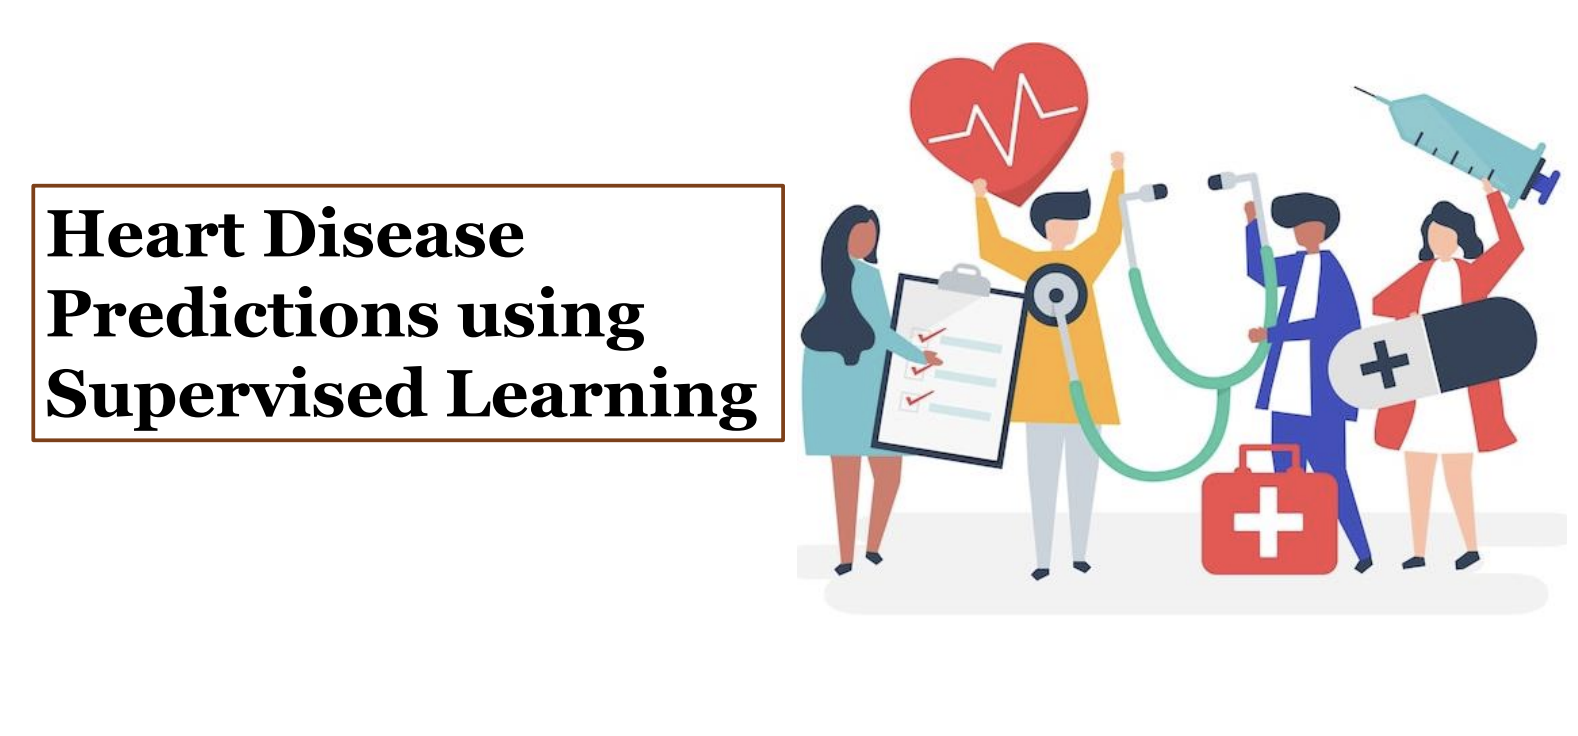

In [1]:
# Import All Necessary Libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# For IPip Install Xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Import Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To import the data
df = pd.read_csv('heart.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# For better understanding and flow of analysis, I will rename the columns

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Data Verification - Data types, Number of Features and Rows, Missing Data, etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
# Statistical Analysis

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

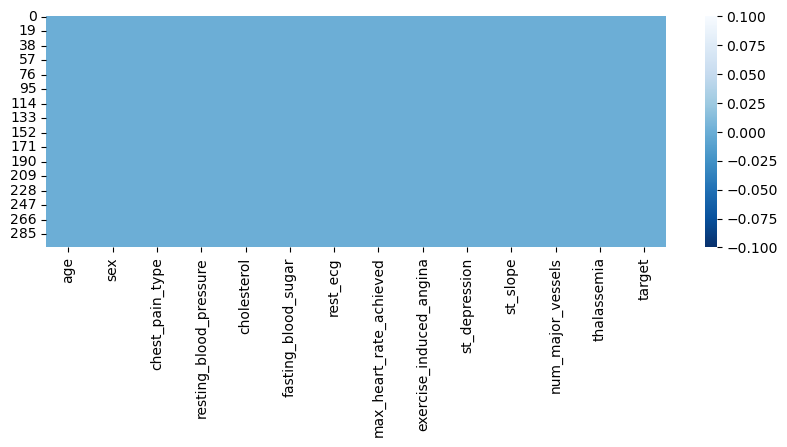

In [8]:
# Check for Missing Values

print(df.isnull().sum())

# Visualizing the Missing Values

plt.figure(figsize= (10, 3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")


# Exploratory Data Analysis

### Univariate Analysis

In [9]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

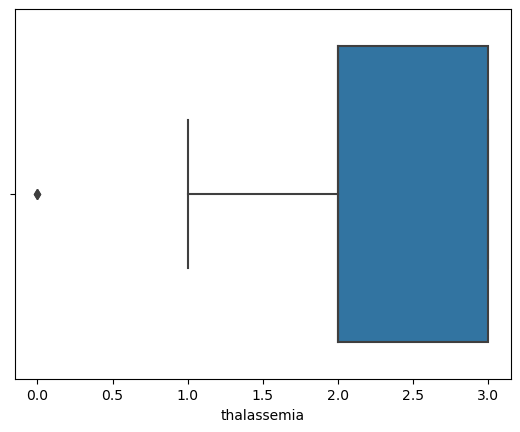

In [10]:
# Check for outliers

sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

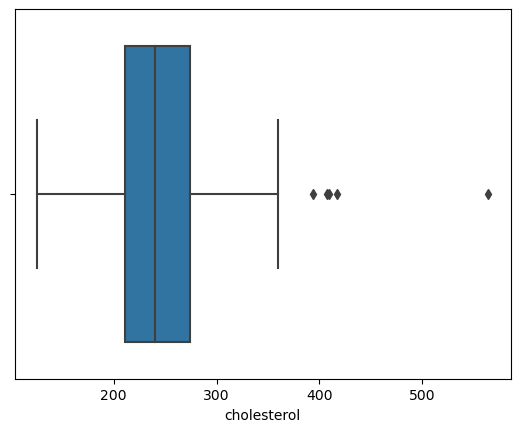

In [11]:
# Check for outliers

sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

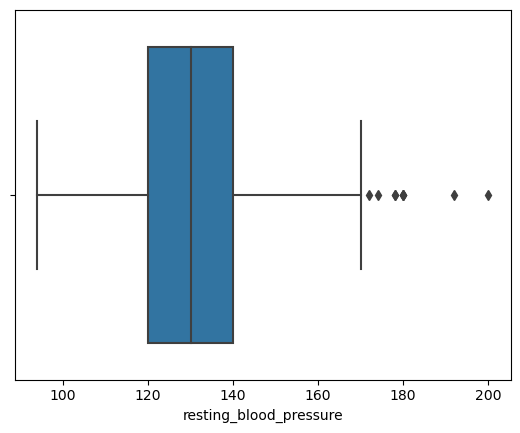

In [12]:
# Check for outliers

sns.boxplot(x=df["resting_blood_pressure"])

<Axes: xlabel='max_heart_rate_achieved'>

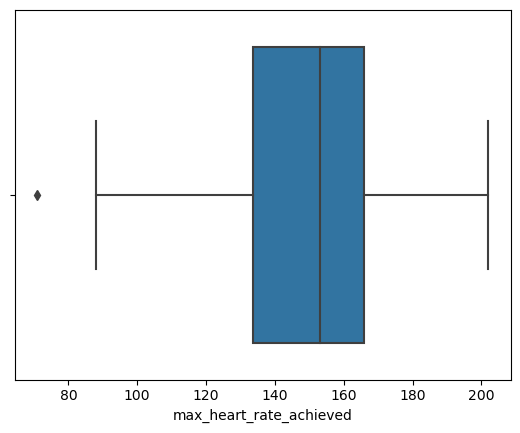

In [13]:
# Check for outliers

sns.boxplot(x=df["max_heart_rate_achieved"])

<Axes: xlabel='chest_pain_type'>

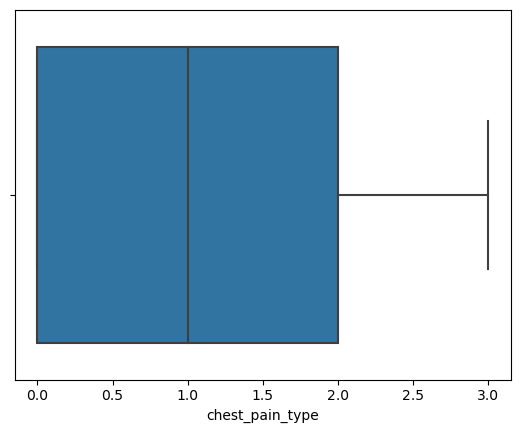

In [14]:
# Check for outliers

sns.boxplot(x=df["chest_pain_type"])

<Axes: xlabel='st_depression'>

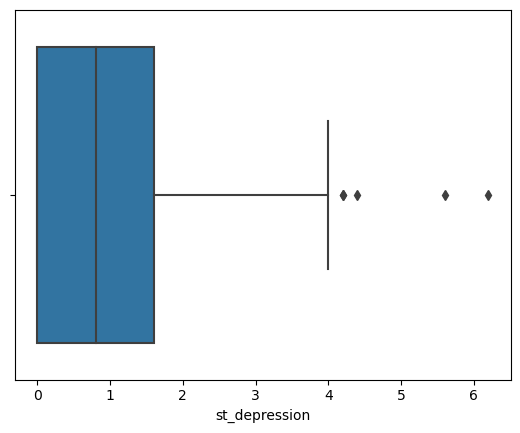

In [15]:
# Check for outliers

sns.boxplot(x=df["st_depression"])

Text(0.5, 1.0, 'Total Number of Patients')

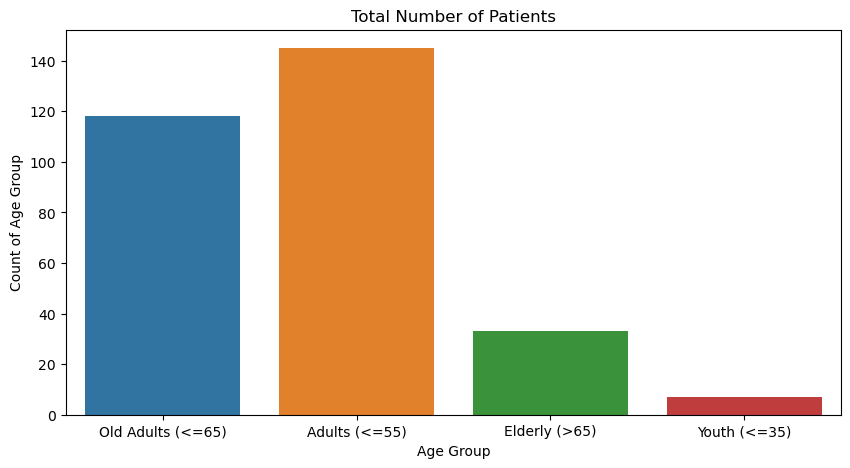

In [16]:
# Data Visualization
# Age_Bracket

def age_bracket(age):
    if age <=35:
        return "Youth (<=35)"
    elif age <= 55:
        return "Adults (<=55)"
    elif age <= 65:
        return "Old Adults (<=65)"
    else:
        return "Elderly (>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize=(10, 5))
sns.countplot(x="age_bracket", data=df)  
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

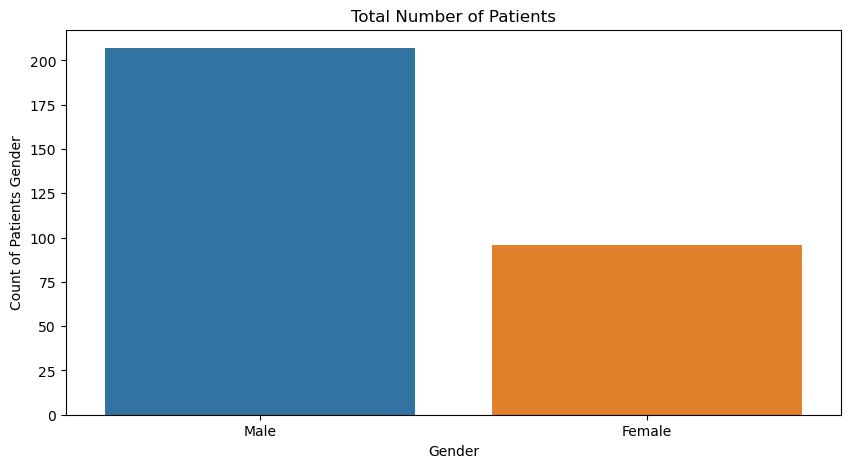

In [17]:
# Data Visualization
# Sex

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
    
df['gender'] = df['sex'].apply(gender)

# Investigating the Gender of Patients

plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df)  
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients')

In [18]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adults (<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adults (<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adults (<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adults (<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adults (<=65),Female


Text(0.5, 1.0, 'Total Number of Patients')

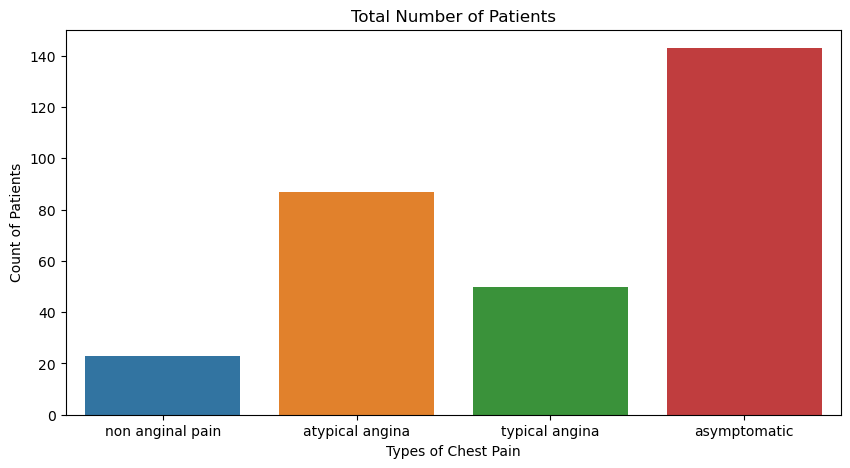

In [19]:
# Data Visualization
# Chest Pain Type (1. Typical Angina, 2. Atypical Angina, 3. Non anginal Pain, 4. Asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non anginal pain"
    else:
        return "asymptomatic"
    
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)  # Assign the result to the 'cp_cat' column

# Investigating the number of patients

plt.figure(figsize=(10, 5))
sns.countplot(x='cp_cat', data=df)  
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients')

In [20]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adults (<=65),Male,non anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adults (<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adults (<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adults (<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adults (<=65),Female,asymptomatic


Yes    165
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

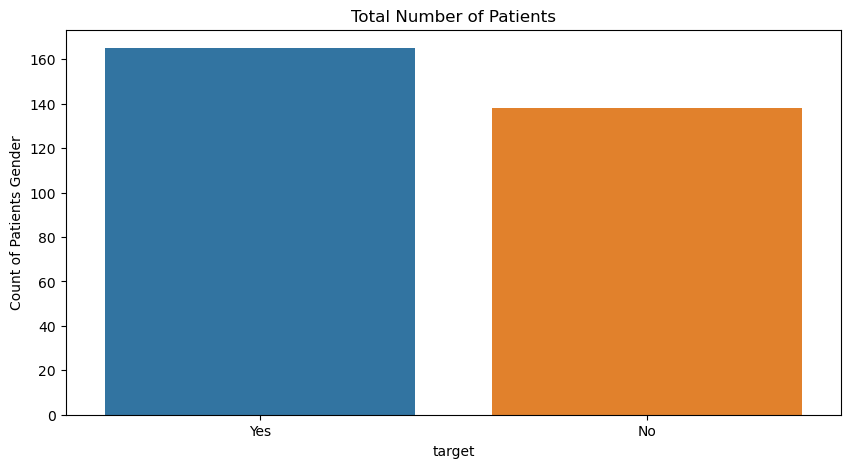

In [21]:
# Data Visualization
# Target Have disease or not (1- yes, 0- No)

def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
df['label'] = df['target'].apply(label)

# Total Patients in each Category
print(df['label'].value_counts())

# Investigating the Number of Patients

plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)  
plt.xlabel('target')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients')

# Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

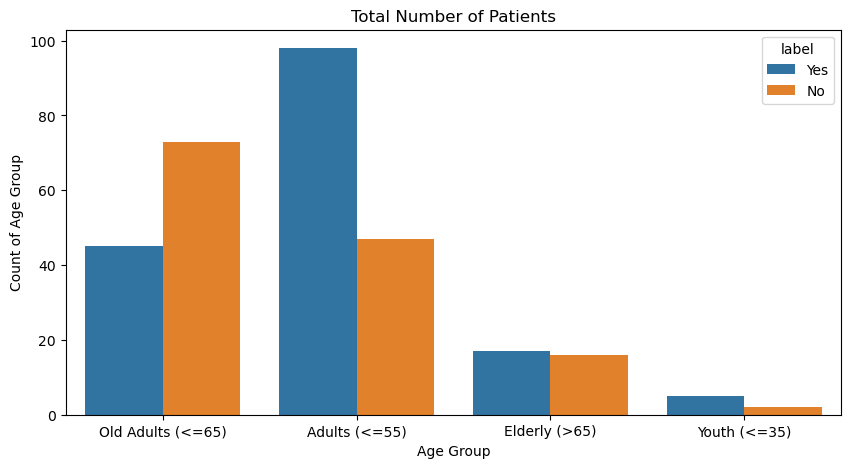

In [22]:
# Investigating the Age Group of Patients by The Target Feature

plt.figure(figsize=(10, 5))
sns.countplot(x="age_bracket", data=df, hue='label')  
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')


Text(0.5, 1.0, 'Total Number of Patients')

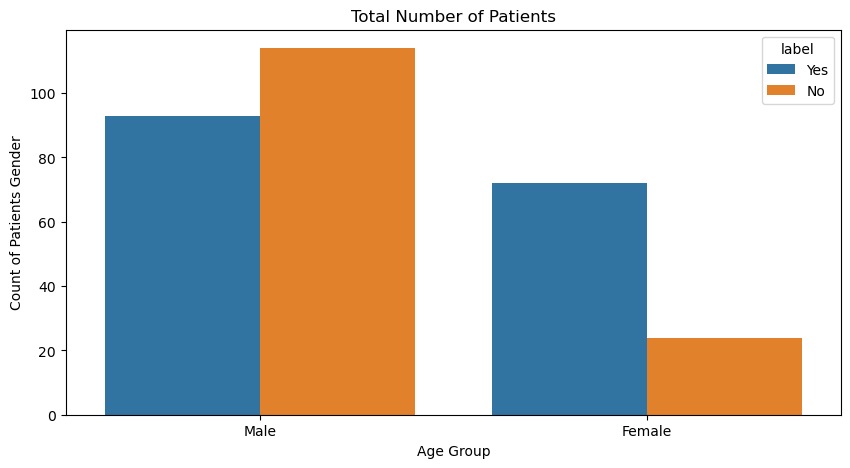

In [23]:
# Investigating the Gender of Patients by The Target Feature

plt.figure(figsize=(10, 5))
sns.countplot(x="gender", data=df, hue='label')  
plt.xlabel('Age Group')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

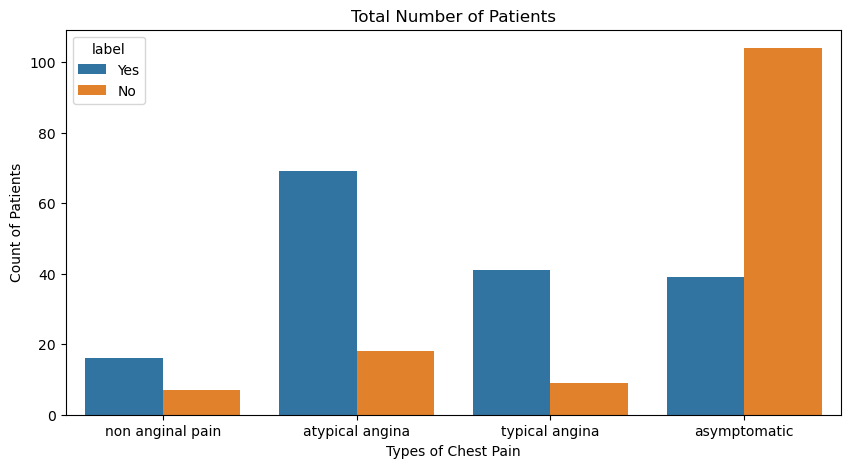

In [24]:
# Investigating the Gender of Patients by The Target Feature

plt.figure(figsize=(10, 5))
sns.countplot(x='cp_cat', data=df, hue='label')  
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients')

# Multivariate Analysis

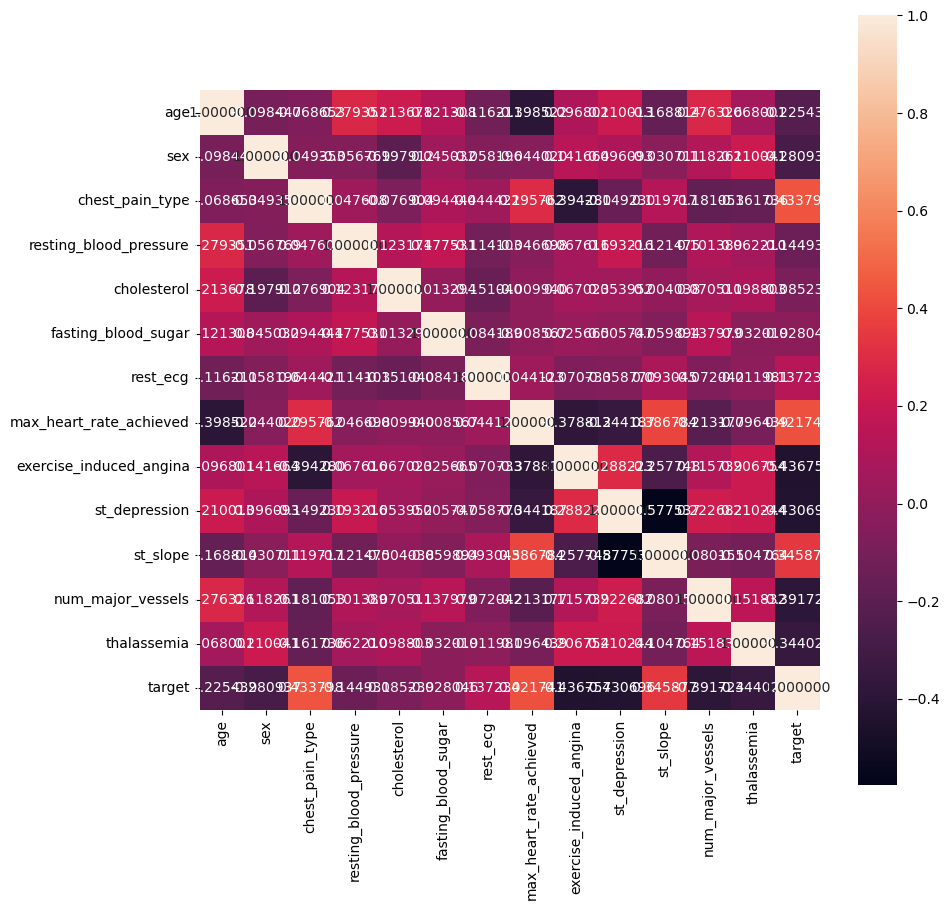

In [25]:
# Correlation Between Saleprice and Other Variables in the Dataset

plt.figure(figsize=(10, 10))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='2f', annot_kws={'size': 10})


In [26]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Feature Engineering / Data Pre-processing

In [27]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adults (<=65),Male,non anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adults (<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adults (<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adults (<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adults (<=65),Female,asymptomatic,Yes


In [28]:
# Create a copy of the data(Exclude target / label alongside other columns that was created)

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia',]]

label = df[['target']]

In [29]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [31]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [32]:
# Dealing with Outliers, resting_blood_pressure, cholesterol, thalassemia

# Normalize the Data

scaler = MinMaxScaler()
df1["Scaled_RBP"] = scaler.fit_transform(df1["resting_blood_pressure"].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1[["cholesterol"]].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1[["thalassemia"]].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1[["max_heart_rate_achieved"]].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## Machine Learning

In [33]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [34]:
# Model Building

# Logistics Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred) )
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:",f1_score(y_test, ly_pred) )
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


In [35]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [36]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


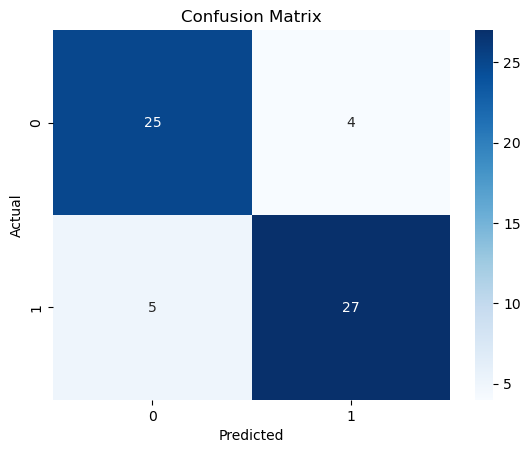

In [37]:
# Create a Confusion Metrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualize the Confusion Matrix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Model Building

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)

# Model Evaluation
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.8688524590163934
Precision: 0.8529411764705882
Recall: 0.90625
F1-score: 0.8787878787878787
AUC-ROC: 0.8669181034482758


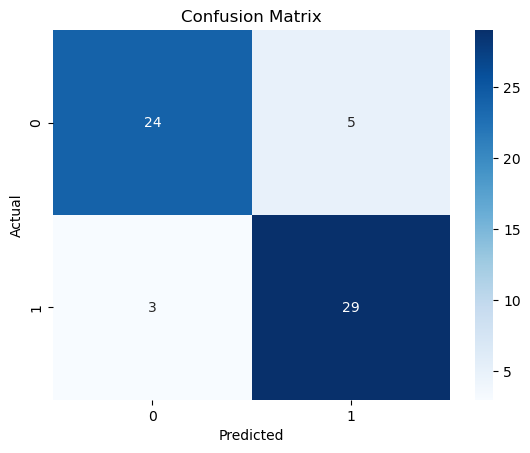

In [39]:
# Create a Confusion Matrix

rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the Matrix

sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
# 8 Machine Learning Algorithms will be Applied to the Dataset

Classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'], 
               [SGDClassifier(), 'SGD Classifier ' ],[SVC(), 'SVC'], 
               [GaussianNB(), 'Naive Bayes'], 
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'], 
               [LogisticRegression(), 'LogisticRegression']
              ]
                

In [59]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGBClassifier'],
 [RandomForestClassifier(), 'RandomForestClassifier'],
 [KNeighborsClassifier(), 'KNeighborsClassifier'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [Deci

In [60]:
!pip install xgboost

In [61]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier [0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score (y_test, pred)
    p_score = precision_score (y_test, pred)
    r_score = recall_score (y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
if model_name != classifiers[-1][1]:
    print('')

In [51]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGBClassifier'],
 [RandomForestClassifier(), 'RandomForestClassifier'],
 [KNeighborsClassifier(), 'KNeighborsClassifier'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [Deci

In [52]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()


Accuracy Score


,XGBClassifier,RandomForestClassifier,KNeighborsClassifier,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,86.89%,75.41%,80.33%,65.57%,86.89%,85.25%,85.25%


In [53]:
print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGBClassifier,RandomForestClassifier,KNeighborsClassifier,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,85.29%,79.31%,88.46%,65.71%,90.0%,92.59%,87.1%


In [54]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGBClassifier,RandomForestClassifier,KNeighborsClassifier,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,90.62%,71.88%,71.88%,71.88%,84.38%,78.12%,84.38%


In [55]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGBClassifier,RandomForestClassifier,KNeighborsClassifier,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,86.69%,75.59%,80.77%,65.25%,87.02%,85.61%,85.29%


# In Conclusion

Upon scrutinizing these metrics, the SGD Classifier consistently demonstrated commendable performance across Precision, Recall, and ROC Score. It secured the highest recall and a competitive ROC score. Consequently, the SGD Classifier emerges as the most effective model for this heart disease prediction task. Given the well-rounded performance of the SGD Classifier across various metrics, it is advisable to adopt it as the ultimate model for predicting heart disease in this project. However, fine-tuning its hyperparameters and conducting additional assessments through cross-validation techniques could potentially enhance the model's performance even further.